In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.linear_model import Perceptron, TweedieRegressor, LinearRegression, LogisticRegression
from sklearn.datasets import load_breast_cancer, load_wine, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set_style('darkgrid')

# $\text{Perceptrons}$

### $$h_{\theta}(x)=\begin{cases}0,&\theta^Tx<0\\1,&\theta^Tx\ge0\end{cases}$$

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


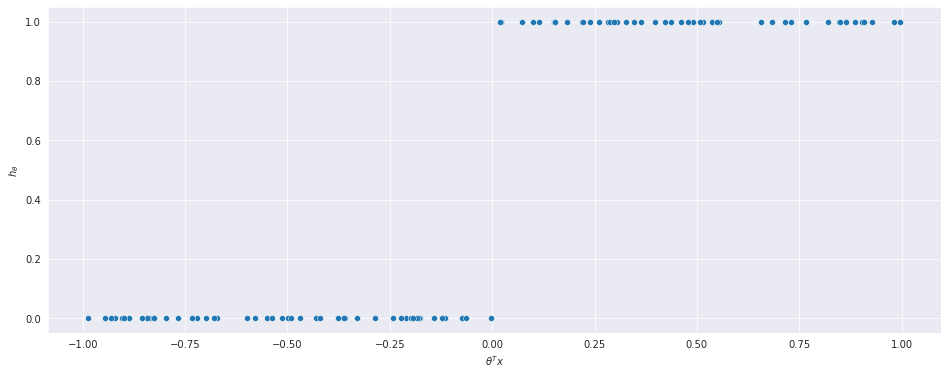

In [ ]:
X = np.random.uniform(-1, 1, 100)
h_theta = np.vectorize(lambda x: 0 if x < 0 else 1)(X)
plt.figure(figsize=(16, 6))
sns.scatterplot(X, h_theta)
plt.xlabel(r'$\theta^Tx$')
plt.ylabel(r'$h_{\theta}$')
plt.show()

### $$\theta_j:=\theta_j+\alpha\left(y^{(i)}-h_{\theta}\left(x^{(i)}\right)\right)x_j^{(i)}=\begin{cases}\theta_j,& \text{if prediction is right}\\\theta_j\pm\alpha x_j^{(i)},& \text{otherwise}\end{cases}$$

### $i - \text{observation}$
### $j - \text{feature}$
### $\alpha - \text{learning rate}$

In [ ]:
df = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(df['data'], df['target'], test_size=0.33, random_state=42)

In [ ]:
clf = Perceptron(random_state=42)
clf.fit(X_train, y_train)

Perceptron(random_state=42)

In [ ]:
clf.score(X_test, y_test)

0.9042553191489362

In [ ]:
def perceptron(X, y, tol=1e-5, alpha=1e-8, batch_prop=1, max_iter=1e5):
    theta = np.random.normal(size=X.shape[1])
    h_theta = lambda t, x: 0 if np.dot(t, x) < 0 else 1
    difference = tol
    thetas = [theta]
    while difference >= tol and max_iter >= 0:
        starter = theta
        for i in np.random.choice(X.shape[0], int(batch_prop * X.shape[0]), replace=False):
            fixed = alpha * (y[i] - h_theta(theta, X[i, :])) * X[i, :]
            theta = theta + fixed
        thetas.append(theta)
        difference = np.linalg.norm(theta - starter)
        max_iter -= 1
    return np.array(thetas)


In [ ]:
thetas = perceptron(X_train, y_train)

In [ ]:
fig = go.Figure(data=[go.Scatter(x=[0], y=[0])],
    layout=go.Layout(
        xaxis=dict(range=[-200, 200], autorange=False),
        yaxis=dict(range=[0, 1], autorange=False),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=np.dot(X_train, thetas[i, :]), y=y_train, mode='markers')]) 
    for i in range(0, thetas.shape[0], 500)]
)
for k in range(len(fig.frames)):
    fig.frames[k]['layout'].update(title_text=f'{500*k/thetas.shape[0] * 100}%')
fig.show()

In [ ]:
h_theta = lambda dot: 0 if dot < 0 else 1
accuracy_score(np.vectorize(h_theta)(np.dot(X_test, thetas[-1, :])), y_test)

0.9414893617021277

# $\text{Exponential Family}$

### $$P(y;\eta)=b(y)e^{\eta^TT(y)-a(\eta)}$$

### $b(y) - \text{Base measure}$
### $\eta - \text{Natural parameter}$
### $T(y) - \text{Sufficient statistic}$
### $a(\eta) - \text{Log-partition}$

## $\text{Bernoulli distribution }$ $$\mathcal{B}(1,p)$$

### $$P(y;p)=p^y(1-p)^{1-y}=e^{\log\left({p^y(1-p)^{1-y}}\right)}=e^{y\log\left(\frac{p}{1-p}\right)+\log{(1-p)}}$$

### $$b(y)=1$$
### $$T(y)=y$$
### $$\eta=\log{\left(\frac{p}{1-p}\right)}\Leftrightarrow p=\frac{1}{1+e^{-\eta}}$$
### $$a(\eta)=-\log{(1-p)}=\log{\left(1+e^{\eta}\right)}$$


## $\text{Normal distribution }$ $$\mathcal{N}(\mu,1)$$

### $$P(y;\mu)=\frac{1}{\sqrt{2\,\pi}}e^{-\frac{(y-\mu)^2}{2}}=\frac{1}{\sqrt{2\,\pi}}e^{-\frac{y^2}{2}}e^{\mu y-\frac{\mu^2}{2}}$$

### $$b(y)=\frac{1}{\sqrt{2\,\pi}}e^{-\frac{y^2}{2}}$$
### $$T(y)=y$$
### $$\eta=\mu$$
### $$a(\eta)=\frac{\mu^2}{2}=\frac{\eta}{2}$$

## $\text{Properties}$

- ### $\text{The likelihood with respect to}$ $\eta$ $\text{is concave}$
- ### $\text{Negative log-likelihood (with respect to } \eta \text{) is convex}$
- ### $\mathbb{E}(y;\eta)=\frac{\partial a(\eta)}{\partial \eta}$
- ### $\mathrm{Var}(y;\eta)=\frac{\partial^2 a(\eta)}{\partial \eta^2}$

# $\text{GLM}$

- ### $\mathbb{R} \rightarrow \mathcal{N}(\mu,\sigma^2)$
- ### $\{0,1\} \rightarrow \mathcal{B}(1,p)$
- ### $\mathbb{N} \rightarrow \mathcal{P}(\lambda)$
- ### $\mathbb{R_+}\rightarrow \mathcal{G}(\alpha,\beta),\ \text{Exp}(\lambda)$

## $\text{Assumptions}$

- ### $y|x;\theta \sim \text{Exponential Family}$
- ### $\eta=\theta^Tx$
- ### $h_{\theta}(x)=\mathbb{E}(y|x;\theta)$ 

## $\text{Terminology}$

### $\mu=\mathbb{E}(y;\eta)=g(\eta)=\frac{\partial}{\partial \eta}a(\eta) - \text{Canonical response function}$
### $\eta=g^{-1}(\mu) - \text{Canonical link function}$

In [ ]:
df = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(df['data'], df['target'], test_size=0.33, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_


(array([  32.14567288, -242.82582016,  559.98738213,  407.64166457,
        -718.68703857,  396.63010925,   10.42304776,  171.81177553,
         627.07976426,  -21.62420711]),
 150.4339752023493)

In [ ]:
lr.coef_ / np.linalg.norm(lr.coef_)

array([ 0.02512526, -0.1897942 ,  0.43768969,  0.31861531, -0.56173035,
        0.31000861,  0.00814672,  0.13428917,  0.49012953, -0.01690162])

In [ ]:
tr = TweedieRegressor(alpha=0)
tr.fit(X_train, y_train)
tr.coef_, tr.intercept_

(array([  32.16834831, -242.83749116,  560.01095635,  407.64600428,
        -718.60982566,  396.41631094,   10.57109631,  172.12751765,
         626.93087916,  -21.6334213 ]),
 150.43389482313785)

In [ ]:
lr.score(X_test, y_test), tr.score(X_test, y_test)

(0.510395426135144, 0.5103892463985498)

In [ ]:
tr_poisson = TweedieRegressor(alpha=0, power=1) # PoissonRegressor
tr_poisson.fit(X_train, y_train)
tr_poisson.coef_, tr_poisson.intercept_

(array([ 0.41086738, -1.81172811,  3.17424763,  2.63991489, -7.00935013,
         5.42576974,  0.03681965,  0.23216361,  5.44761565, -0.2155621 ]),
 4.947479826609727)

In [ ]:
tr_poisson.score(X_test, y_test)

0.5087290841800067

In [ ]:
tr_gamma = TweedieRegressor(alpha=0, power=2) # GammaRegressor
tr_gamma.fit(X_train, y_train)
tr_gamma.coef_, tr_gamma.intercept_

(array([ 0.3536005 , -2.16708257,  3.07239569,  2.77938521, -7.27476962,
         5.78069998, -0.17429997, -0.03744373,  5.95118353, -0.50298747]),
 4.946458693398234)

In [ ]:
tr_gamma.score(X_test, y_test)

0.48407169500327774

## $\text{Logistic Regression} $

### $\{0,1\}\rightarrow\mathcal{B}(1,p)\Rightarrow\mathbb{E}(y|x;\theta)=p=\frac{1}{1+e^{-\eta}}=\frac{1}{1+e^{-\theta^Tx}}\text{}$

In [ ]:
df = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(df['data'], df['target'], test_size=0.33, random_state=42)

In [ ]:
clf = LogisticRegression(penalty='none', random_state=42)
clf.fit(X_train, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(penalty='none', random_state=42)

In [ ]:
clf.score(X_test, y_test)

0.9521276595744681

## $\text{Softmax Regression}$

### $K-\text{Set of classes}$
### $\theta_c-\text{Model parameter to train for class }c$
### $x-\text{Data}$
### $\text{Algorithm:}$
### $$\forall_{c\in K}\quad\theta_c^Tx\rightarrow e^{\theta_c^Tx}\rightarrow \frac{e^{\theta_c^Tx}}{\sum_{k\in K}e^{\theta_k^Tx}}=\hat{p}\rightarrow\min_{\theta_c}{H(p,\hat{p})}$$

### $\text{Cross Entropy}$

### $$H(p,\hat{p})=-\sum_{y\in\mathcal{Y}}{p(y)\log{\hat{p}(y)}}$$

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



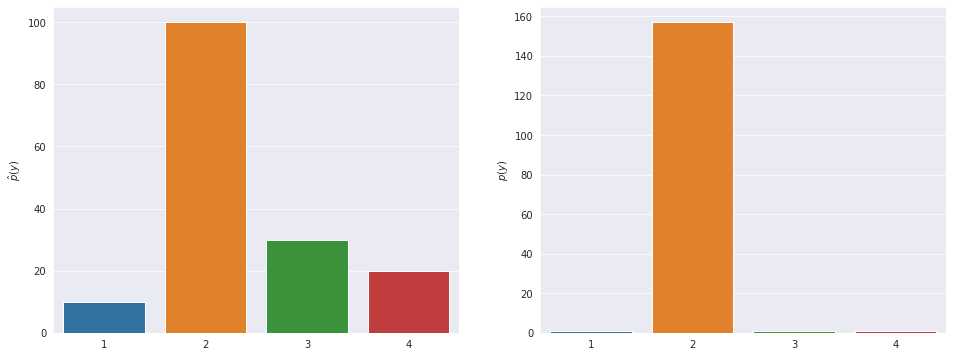

In [ ]:
X = np.array([1] * 10 + [2] * 100 + [3] * 30 + [4] * 20)
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(X)
plt.ylabel(r'$\hat{p}(y)$')
Y = np.array([1] + [2] * 157 + [3] + [4])
plt.subplot(1, 2, 2)
sns.countplot(Y)
plt.ylabel(r'$p(y)$')
plt.show()

### $$\text{Goal}-\text{to minimize (using gradient descent)}$$
### $$H(p,\hat{p})=-\sum_{k\in K}p(y_k)\log{\hat{p}(y_k)}=-\log{\hat{p}(y_c)}=-\log{\left(\frac{e^{\theta_c^Tx}}{\sum_{k\in K}{e^{\theta_k^Tx}}}\right)}$$

In [ ]:
df = load_wine()
X_train, X_test, y_train, y_test = train_test_split(df['data'], df['target'], test_size=0.33, random_state=42)

In [ ]:
clf = LogisticRegression(penalty='none', random_state=42)
clf.fit(X_train, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(penalty='none', random_state=42)

In [ ]:
clf.score(X_test, y_test)

0.9661016949152542

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12a2f943-3a04-4b70-8966-c7208ea23144' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>